These are the steps in which we will develop a machine learning model to accurately predict personal loan status.

1.) Define the Problem and Objectives

2.) Data Collection and Preparation

3.) Exploratory Data Analysis (EDA)

4.) Feature Engineering

5.) Model Selection and Training

----

1.) Problem & Objective

Our primary objective revolves around devising a predictive model to discern the approval status of loan applications. Utilizing machine learning algorithms, we aim to determine whether each application will be approved or denied based on a diverse set of applicant-related features. This file represents a compelling journey within the domain of financial prediction and lends valuable insights to the decision-making process in the lending industry.

----

2.) Data Collection and Preparation

In [8]:
# Data Processing
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [9]:
# Read the train data file
train_data = pd.read_csv('train.csv')

# Find general information regarding test data
print(train_data.head())
print(train_data.columns)

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [10]:
# Determine quantity of null values within data set
print('Train Data Null Values')
print(train_data.isnull().sum(), "\n")

# Delete rows with null values within data set
train_data = train_data.dropna()
print('Train Data Null Values after cleaning')
print(train_data.isnull().sum())

train_data = train_data.drop(['Loan_ID'], axis=1)

Train Data Null Values
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64 

Train Data Null Values after cleaning
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


----

3.) Exploratory Data Analysis (EDA)

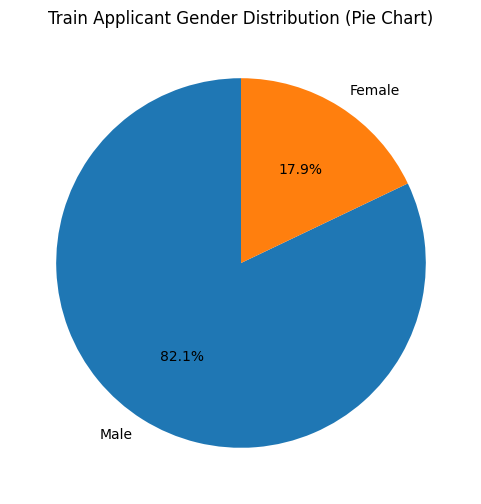

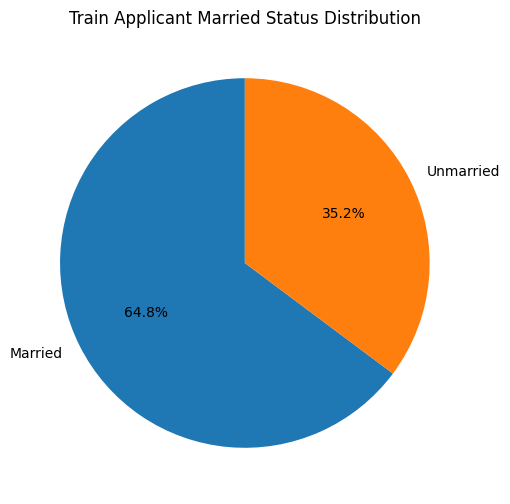

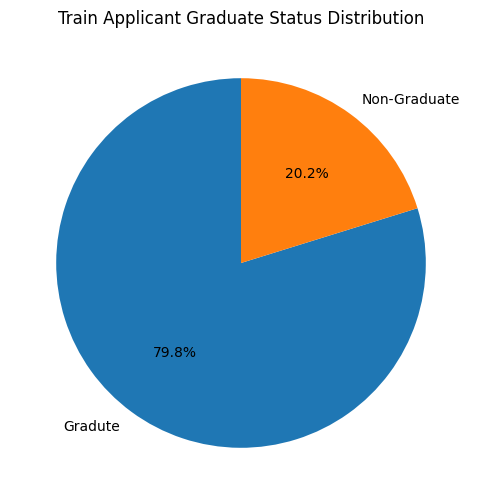

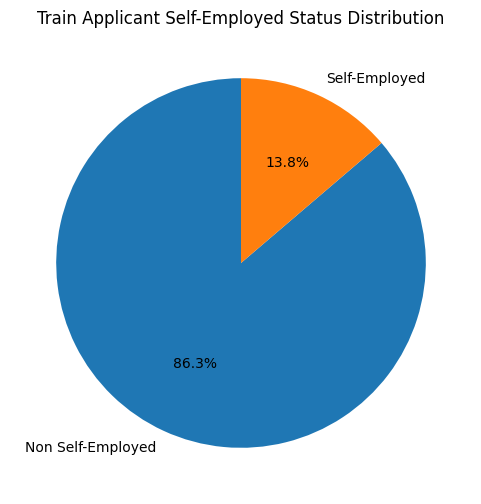

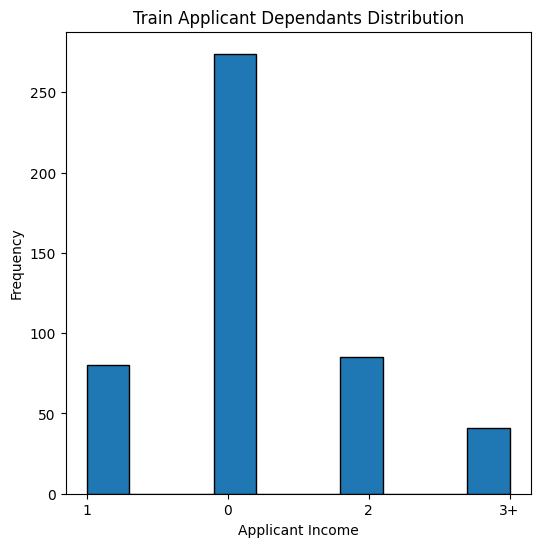

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


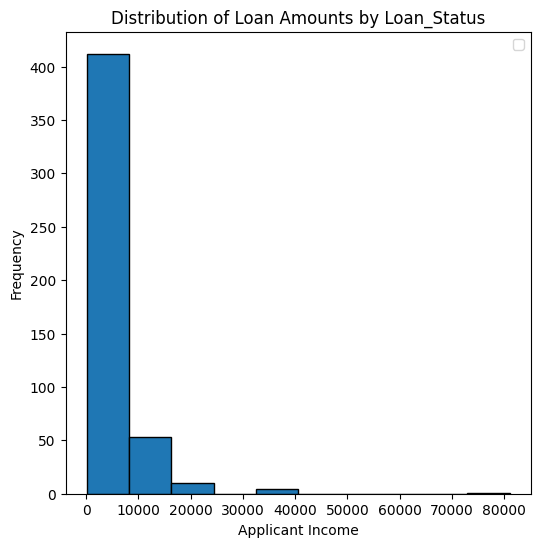

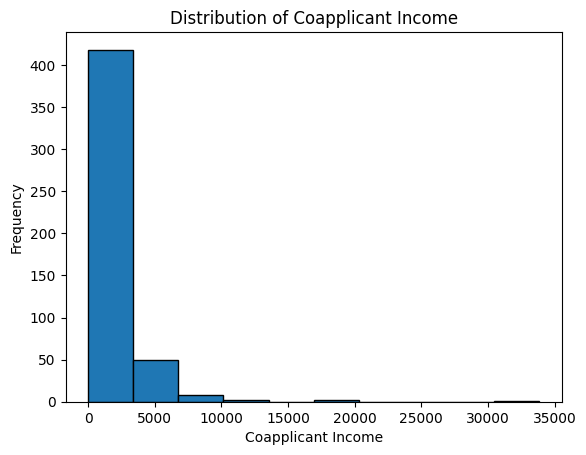

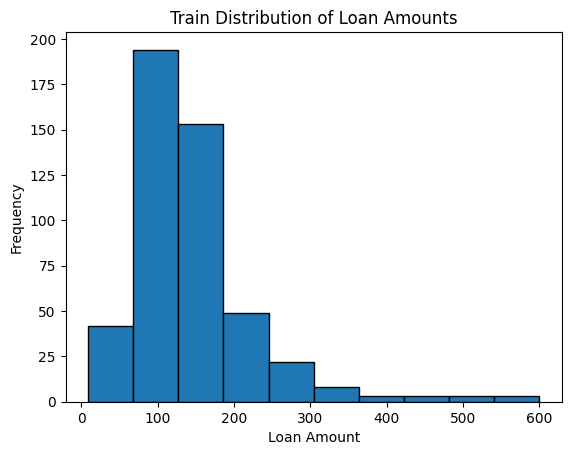

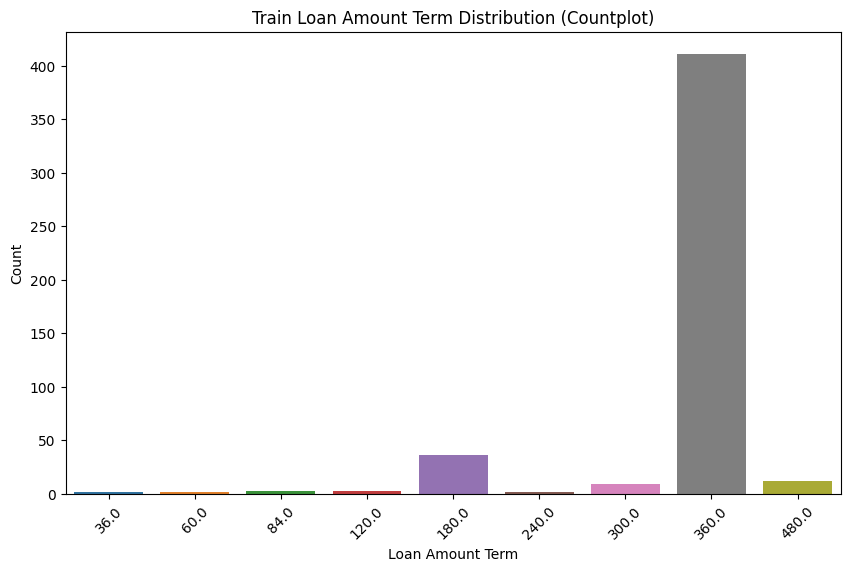

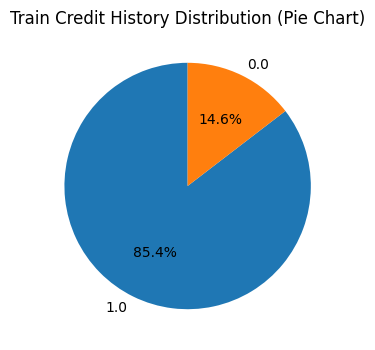

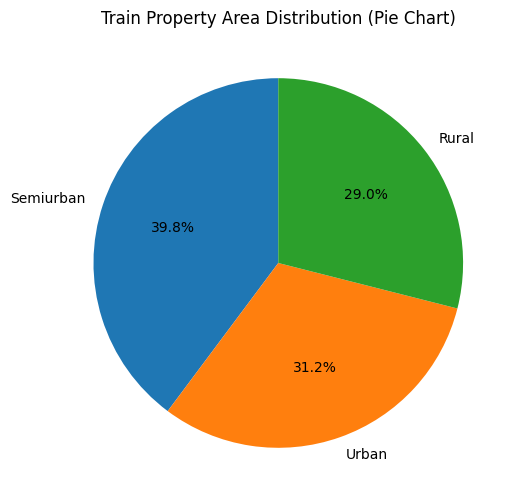

In [11]:
# Display the current train data
# Display test data gender distrubution: Pie Chart
test_gender_data = train_data['Gender']
test_gender_counts = test_gender_data.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(test_gender_counts,
        labels=['Male','Female'],
        autopct='%1.1f%%',
        startangle=90)
test_gender_fig = plt.title('Train Applicant Gender Distribution (Pie Chart)')
plt.show()

# Display test data married status distrubution: Pie Chart
test_married_data = train_data['Married']
test_married_counts = test_married_data.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(test_married_counts,
        labels=['Married','Unmarried'],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Train Applicant Married Status Distribution')
plt.show()

# Display test data graduate distrubution: Pie Chart
test_grad_data = train_data['Education']
test_grad_counts = test_grad_data.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(test_grad_counts,
        labels=['Gradute','Non-Graduate'],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Train Applicant Graduate Status Distribution')
plt.show()

# Display test data graduate distrubution: Pie Chart
test_selfEmploy_data = train_data['Self_Employed']
test_selfEmploy_counts = test_selfEmploy_data.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(test_selfEmploy_counts,
        labels=['Non Self-Employed','Self-Employed'],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Train Applicant Self-Employed Status Distribution')
plt.show()

# Display test data number of dependants distrubution: Bar Chart
test_dependant_data = train_data['Dependents']
plt.figure(figsize=(6, 6))
plt.hist(test_dependant_data,
         bins=10,
         edgecolor='black')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Train Applicant Dependants Distribution')
plt.ylabel('Frequency')
plt.show()

# Creatiing a Histogram of Distribution of Applicant Income
plt.figure(figsize=(6, 6))
applicant_income = train_data['ApplicantIncome']
plt.hist(applicant_income, bins=10, edgecolor='black')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Distribution of Applicant Incomes')
# plt.show()unt')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amounts by Loan_Status')
plt.legend()  # Show the legend to distinguish the two histograms
plt.show()


# Creatiing a Histogram of Distribution of Coapplicant Income
coapplicant_income = train_data['CoapplicantIncome']
plt.hist(coapplicant_income, bins=10, edgecolor='black')
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')
plt.title('Distribution of Coapplicant Income')
plt.show()


# Creatiing a Histogram of Distribution of Loan Amounts
loan_amount = train_data['LoanAmount']
plt.hist(loan_amount, bins=10, edgecolor='black')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Train Distribution of Loan Amounts')
plt.show()


#Creating a Countplot of Distribution of Loan Amount Terms
loan_amount_term = train_data['Loan_Amount_Term']
plt.figure(figsize=(10, 6))
sns.countplot(x=loan_amount_term)
plt.xlabel('Loan Amount Term')
plt.ylabel('Count')
plt.title('Train Loan Amount Term Distribution (Countplot)')
plt.xticks(rotation=45)
plt.show()


# Creating a Piechart of Distribution of Loan Amount Terms
credit_history = train_data['Credit_History']
credit_history_counts = credit_history.value_counts()
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
plt.pie(credit_history_counts, labels=credit_history_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Train Credit History Distribution (Pie Chart)')
plt.show()



# Creatiing a Piechart of Distribution of Property Areas
property_area = train_data['Property_Area']
property_area_counts = property_area.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(property_area_counts, labels=property_area_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Train Property Area Distribution (Pie Chart)')
plt.show()

----

4.) Feature Engineering

In [12]:
# Create categorical and numerical columns to train model
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Seperate the target variable and drop it from the train data
loanStatus = train_data['Loan_Status']
train_data = train_data.drop(['Loan_Status'], axis=1)

In [13]:
# Importing the required libraries to encode data
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Creating an instance of the OneHotEncoder with 'handle_unknown' parameter set to 'ignore'
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Using the OneHotEncoder to transform the categorical columns in the 'train_data' DataFrame
ohe_X = pd.DataFrame(encoder.fit_transform(train_data[categorical_columns]))

# Assigning column names to the one-hot encoded DataFrame using the original categorical column names
ohe_X.columns = encoder.get_feature_names_out(categorical_columns)

# Dropping the original categorical columns from the 'train_data' DataFrame
train_data.drop(categorical_columns, axis=1, inplace=True)

# Setting the index of the one-hot encoded DataFrame to match the 'train_data' index
ohe_X.index = train_data.index

# Concatenating the one-hot encoded DataFrame with the remaining columns of 'train_data'
train_data = pd.concat([train_data, ohe_X], axis=1)

# Displaying the first few rows of the updated 'train_data' DataFrame
train_data.head()


c:\Users\alexr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,...,Credit_History_1.0,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0
1,4583,1508.0,128.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3000,0.0,66.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2583,2358.0,120.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,6000,0.0,141.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,5417,4196.0,267.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


----

5.) Model Selection and Training:

In [14]:
# FOR LOAN STATUS PREDICTION

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#  'train_data' is our DataFrame with all the encoded features, and 'loanStatus' is the target variable
X = train_data
y = loanStatus

# Step 1: Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Cho# Step 2: Choose a machine learning algorithm and create an instance of the model
most_effective = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 3: Fit the model to the training data
most_effective.fit(X_train, y_train)

# ctions on the testing data
most_effective_ypred = most_effective.predict(X_test)

# Step 5: Evaluate the model's performance
accuracy = accuracy_score(y_test, most_effective_ypred)
classification_report_output = classification_report(y_test, most_effective_ypred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.8229166666666666
Classification Report:
              precision    recall  f1-score   support

           N       0.87      0.46      0.60        28
           Y       0.81      0.97      0.89        68

    accuracy                           0.82        96
   macro avg       0.84      0.72      0.75        96
weighted avg       0.83      0.82      0.80        96



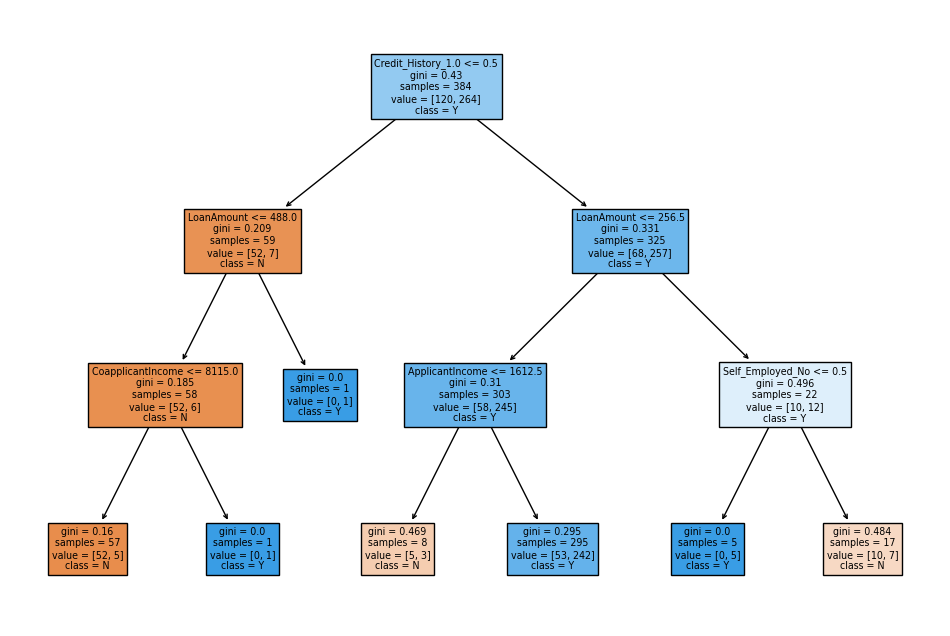

In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming you have already loaded and preprocessed your data into X and y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the decision tree classifier with a maximum depth of 3 (you can adjust this value)
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns.tolist(), class_names=list(y.unique()), filled=True)
plt.show()
